## Поиск карты с помощью canny

In [1]:
# Загрузка картинок
#!mkdir media
#!wget https://github.com/antoleb/cv_notebooks/raw/master/week2/media/card.jpeg -P media &> /dev/null

In [2]:
import cv2
import matplotlib

from matplotlib import pyplot as plt

In [3]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [4]:
image = cv2.imread('./media/card.jpeg')

In [5]:
image.shape

(1280, 960, 3)

In [6]:
image = cv2.resize(image, (480, 640))

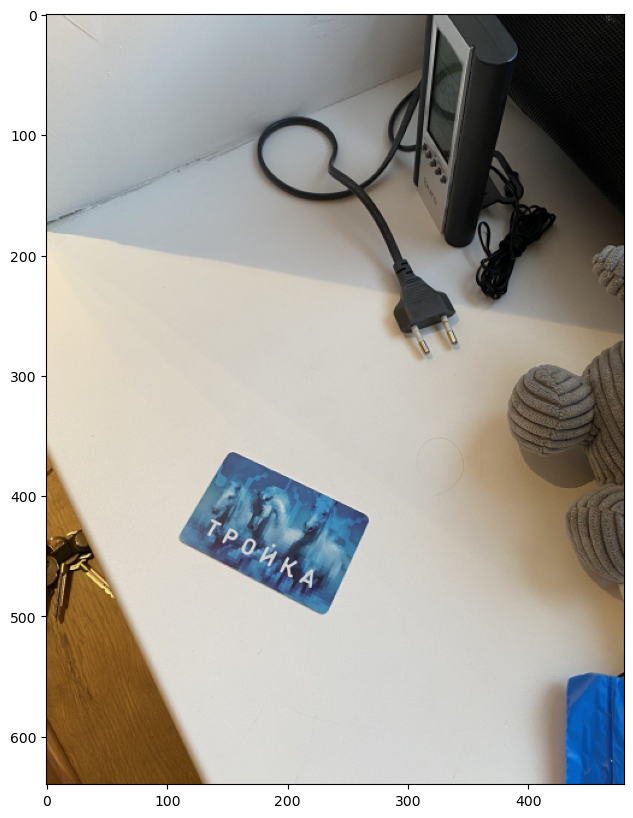

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

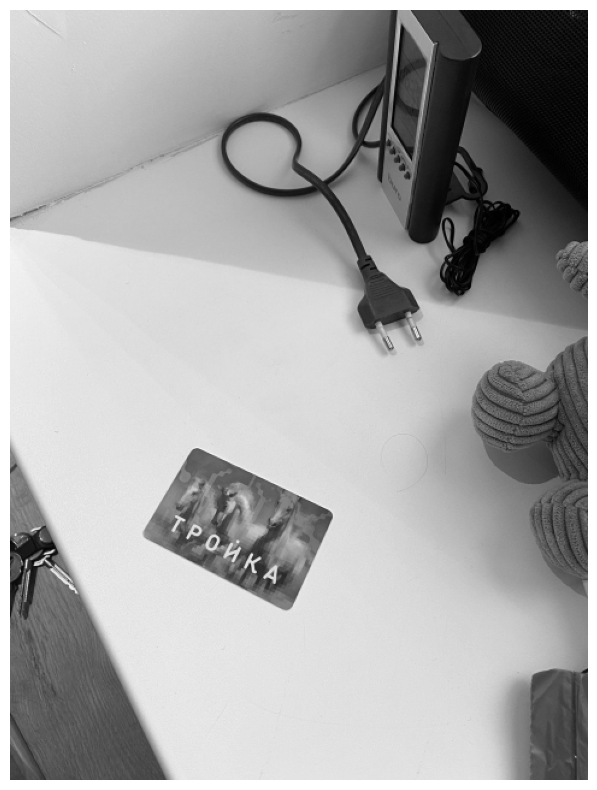

In [8]:
# Переводим в ч/б
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()



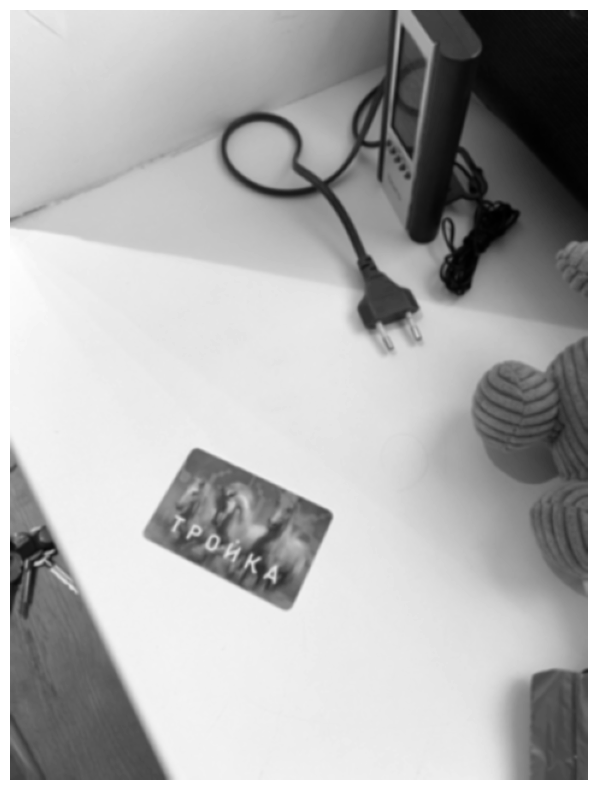

In [9]:
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(gray_blurred, cmap='gray')
plt.axis('off')
plt.show()

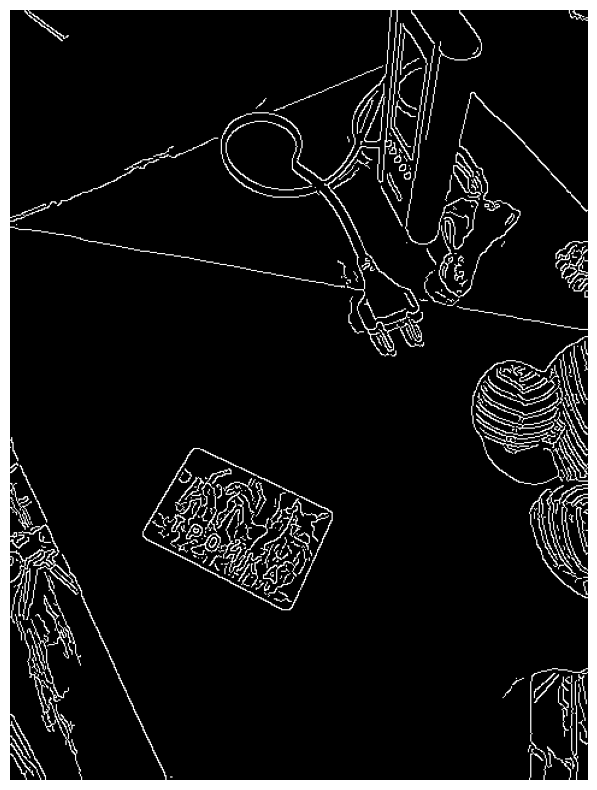

In [10]:
edged = cv2.Canny(gray_blurred, 10, 50)
plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
# находим контуры

cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts[1]

array([[[465, 621]],

       [[464, 622]],

       [[461, 622]],

       [[465, 622]],

       [[467, 624]],

       [[467, 630]],

       [[467, 629]],

       [[468, 628]],

       [[468, 627]],

       [[467, 626]],

       [[467, 624]],

       [[466, 623]],

       [[466, 622]]], dtype=int32)

In [12]:
# Теперь мы хотим найти такие контуры, что приближаются черетыхугольником

cnts = sorted(cnts,
              key = cv2.contourArea, # функция-компоратор
              reverse = True)

solution = None
for c in cnts:
    # считаем пермиметр чтобы задать погрешность
    peri = cv2.arcLength(c, True)
    # считаем аппроксимацию
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        solution = approx
        break

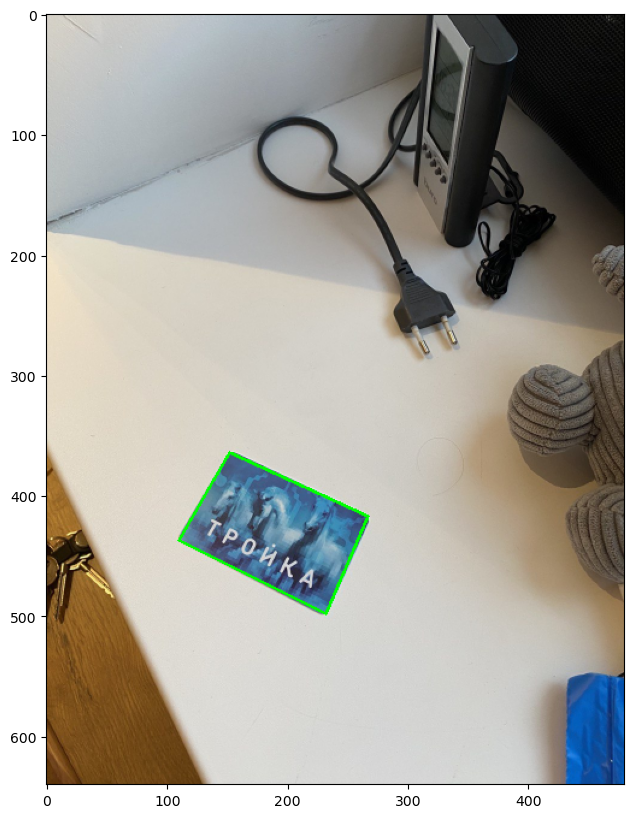

In [13]:
image_to_draw = image.copy()
cv2.drawContours(image_to_draw, [solution], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_to_draw, cv2.COLOR_BGR2RGB))